In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, Table, inspect

In [25]:
engine = create_engine("mssql://DESKTOP-VU8DSEC/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server")
connection = engine.connect()

In [26]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [27]:
print(inspector.get_table_names(schema="HumanResources"))

['Department', 'Employee', 'EmployeeDepartmentHistory', 'EmployeePayHistory', 'JobCandidate', 'Shift']


In [28]:
for col in inspector.get_columns(table_name="EmployeePayHistory", schema="HumanResources"):
    print(col["name"])

BusinessEntityID
RateChangeDate
Rate
PayFrequency
ModifiedDate


In [29]:
department_overview_sql = """
SELECT
    HRd.Name AS "Department Name",
    COUNT(HRE.BusinessEntityID) AS "Employee Count",
    AVG(HReph.Rate) AS "Average Salary",
    AVG(Datediff("yyyy",HRE.BirthDate,getdate())) as "Average age"
FROM
    HumanResources.Employee AS HRE
    JOIN
        HumanResources.EmployeeDepartmentHistory AS HRedh ON HRE.BusinessEntityID = HRedh.BusinessEntityID
    JOIN
        HumanResources.Department AS HRd ON HRedh.DepartmentID = HRd.DepartmentID
            LEFT JOIN
                HumanResources.EmployeePayHistory AS HReph ON HRE.BusinessEntityID = HReph.BusinessEntityID
GROUP BY
    HRd.Name
ORDER BY
    "Department Name" ASC
"""
department_overview_df = pd.read_sql(department_overview_sql, engine)
department_overview_df

,Department Name,Employee Count,Average Salary,Average age
0,Document Control,5,14.3884,41
1,Engineering,9,33.6723,55
2,Executive,4,68.3034,49
3,Facilities and Maintenance,7,13.0316,55
4,Finance,13,29.7742,46
5,Human Resources,6,18.0248,44
6,Information Services,10,34.1586,43
7,Marketing,14,18.9364,46
8,Production,198,13.5409,44
9,Production Control,8,16.7746,43


Text(0, 0.5, 'Average Age')

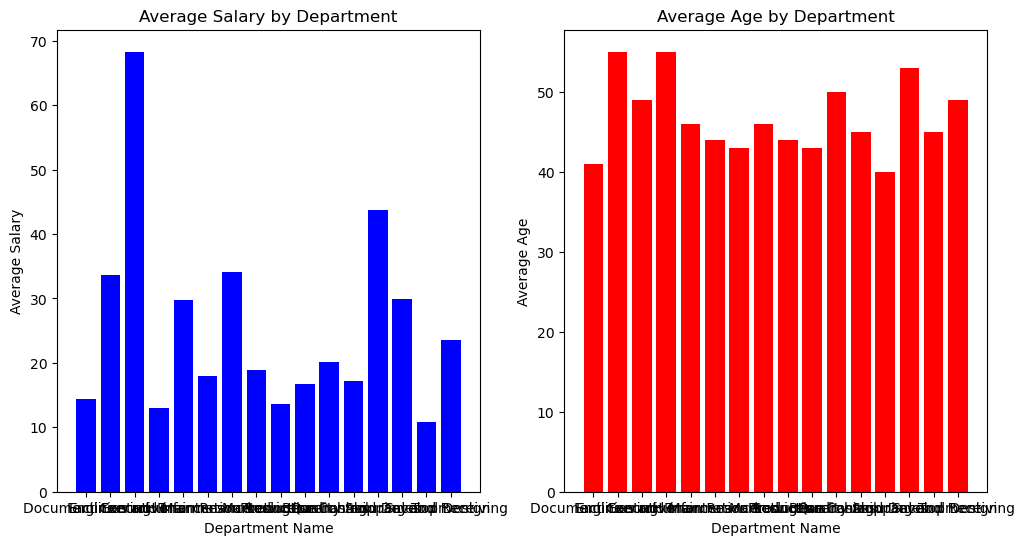

In [30]:
#fixa namn måste göras!
#Average salary / department
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(department_overview_df["Department Name"], department_overview_df["Average Salary"], color="blue")
plt.title("Average Salary by Department")
plt.xlabel("Department Name")
plt.ylabel("Average Salary")

#Average age / department
plt.subplot(1, 2, 2)
plt.bar(department_overview_df["Department Name"], department_overview_df["Average age"], color="red")
plt.title("Average Age by Department")
plt.xlabel("Department Name")
plt.ylabel("Average Age")

In [31]:
p = 0.682 #procent anställda i produktion
n = 290 #totalt antalet anställda
z = 1.96 #95% KI
s_p = np.sqrt(p*(1-p)/n)

ci_lower = p - z*s_p
ci_upper = p + z*s_p

print(ci_lower)
print(ci_upper) 

0.6284002431297332
0.7355997568702669


In [32]:
salary_sql = """
SELECT
    HRE.Gender,
    AVG(Datediff("yyyy",HRE.BirthDate,getdate())) as "Average age",
    AVG(HReph.Rate) AS "Average hourly rate"
FROM 
    HumanResources.Employee AS HRE,
    HumanResources.EmployeePayHistory AS HReph
WHERE
    HRE.BusinessEntityID = HReph.BusinessEntityID

GROUP BY
    Gender
"""
salary_df = pd.read_sql(salary_sql, engine)
salary_df

,Gender,Average age,Average hourly rate
0,F,46,19.7182
1,M,45,17.0025


Text(0, 0.5, 'Average Hourly Rate')

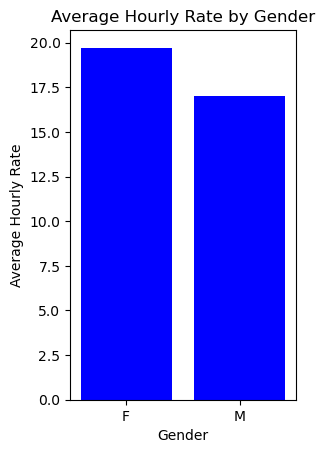

In [33]:
plt.subplot(1, 2, 1)
plt.bar(salary_df["Gender"], salary_df["Average hourly rate"], color="blue")
plt.title("Average Hourly Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Hourly Rate")